 # Artificial Intelligence CA2 
 ## Lecturer: David McQuaid
 ## Student: Luiza Cavalcanti Albuquerque Brayner (2020309)

# Question 1

<b>A) i) Indentify the differences between a graph and a tree: </br></b>
Graphs are non-linear Data Structures which are great for representing relationships, while Trees are non-linear Data Structures, they are great for representing hierarchy and are often used for sorted data. <b> Regarding connections: </b> In a graph, there are no strict rules about relationships between nodes. In a tree, each node (not taking into consideration the root node) has exacly one parent.</br> <b>Example: </b> Considering a social network as an example, <b>regarding a graph:</b> Nodes will be represented by each person and edges the connections betwen those people. Such as: Luiza, Ivan, Gabriel and Leticia are nodes and the edges are: Luiza is friends with Ivan and Gabriel, Ivan is friends with Gabriel, Gabriel follows Leticia, and Leticia and Luiza are not directly connected.  <b>regarding a Tree:</b> Considering the same connections but different organization, Imagine Luiza as the root node and connections forming a hierarchical structure. With that is possible follow the tree rules and paths from the root to any node, connected downwards in a structured manner. Making a single path from the root to any node, and each node (except the root) has exactly one parent. 

</br> <b> References:</b> Vaghani, R. (2023). 'Difference between graph and tree', Geeks for geeks. Available at: https://www.geeksforgeeks.org/difference-between-graph-and-tree/ (Accessed 11 November 2023). 

<b> A) ii) Explain in detail how the graph is an abstraction of the problem: </b> </br> Graphs are constructs used for modeling a real-word problem. Finding the shortest route between two cities as an example. Basically, graphs do that by dividing the problem into a set of connected nodes, being each node a vertex and each of the connections an edge. Graphs abstration is good because allows to only focus on the essential elements of the problem to find an optimal solution. 
</br>
<b> Example: </b> </br>
Continuing the example given above, nodes being cities, such as: city X, Y, Z and W. Edges being the roads, or any direct link between cities. The weights of the edges will be represented by the distancy between each city.</br> Following abstraction, it is possible to consider: 
</br> <b> Problem: </b> Shortest way from city X to city W. </br>
<b> Graph Abstration: </b> Starting from node X and exploring all other connected cities, until the final stop, in this case, city W.</br>
<b> Algorithm: </b>As an example of Dijkstra's algorithm given in class, to apply the shortest path. The algorithm will explore all short distances from the source (city X) to all the other cities and it will provide the shortest path my the end. 
</br> <b> References:</b> 'Chapter 4. Graph problems', Livebook. Available at: https://livebook.manning.com/book/classic-computer-science-problems-in-swift/chapter-4/ (Accessed 12 November 2023).

<b> A) (iii) Identify the advantages of using a visualisation such as the one shown in Fig. 1. </b> </br> The advantages of using visualizations in general is that provides clarity and comprehension, it makes easier for pattern recognition, decision making and a better communication of the topic between others. 
</br>
Regarding the visualizations representing all possible routes to a solution, such as the one shown in Fig. 1, it allows a comprehensive understanding, by giving an overview of available route options and their relationships, visualizing that faciliates the comparison and identification of differences, patterns, etc. Following that, the stakeholders can then make an informed decision, such as the possibility to plan and optimize routes, based on cost, efficiency, time, distance etc. </br> 
In this case, to summarise, the Fig. 1. visualization help in undertanding the scope of the problem, presents different possibilities and allows to inform all routes in a clear way. 
</br> <b>References: </b> 'Importance of Data Visualization for Your Business'. TREEHOUSE. Available at: https://treehousetechgroup.com/importance-of-data-visualization-for-your-business/ (Accessed 12 November 2023).

<b>B) Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage. </b> </br>


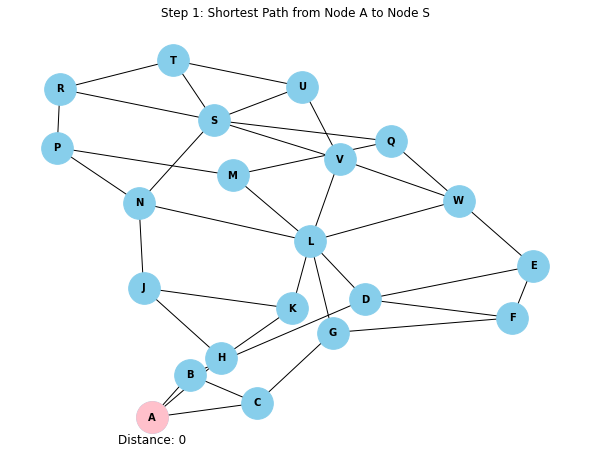

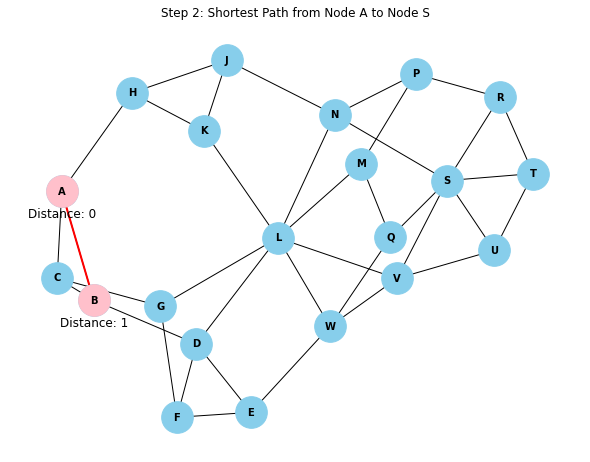

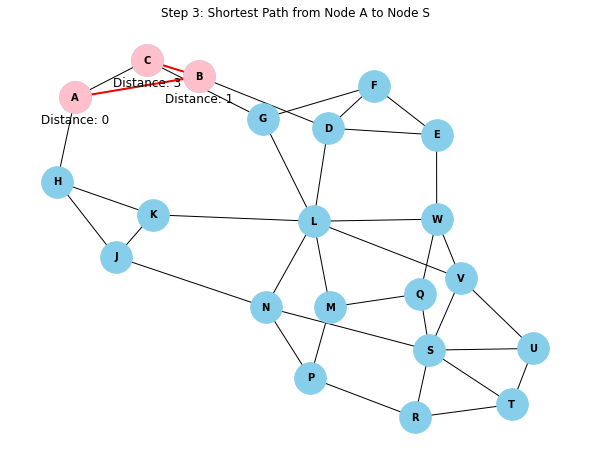

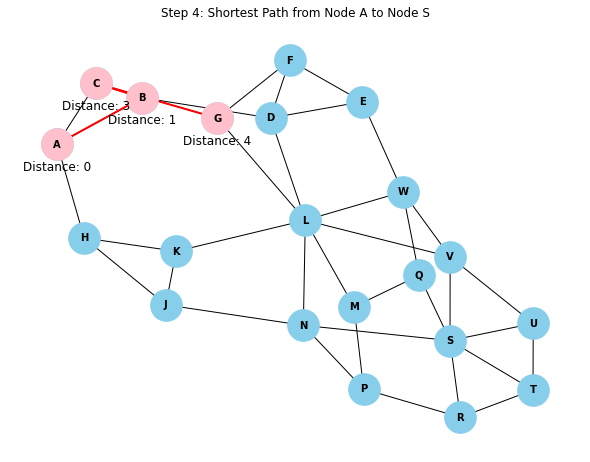

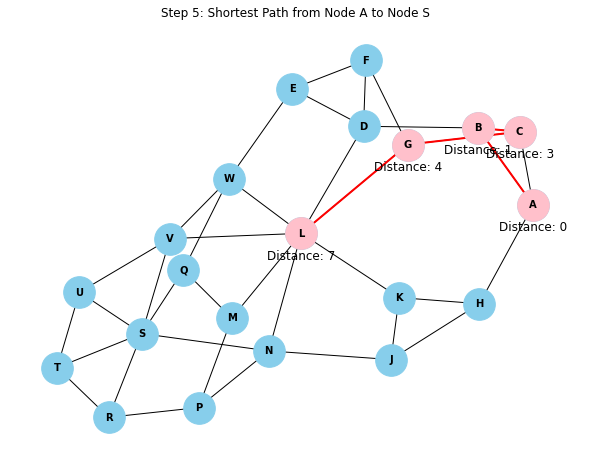

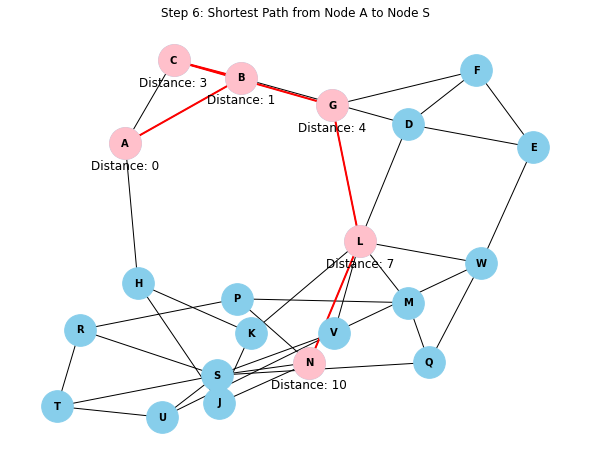

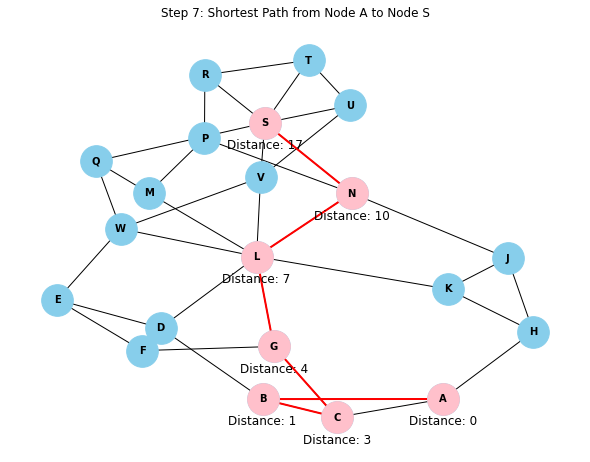

In [69]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# dijkstra algorithm 
def dijkstra(graph, start_node, end_node):
#     created the set to store visited nodes
    visited_nodes = set()
#     hashmap to store distance between nodes
    distances = {start_node: 0}
    priority_queue = [(0, start_node)]
    previous = {}

    while priority_queue:
        weight, node = heapq.heappop(priority_queue)

        if node == end_node:
            break

        if node not in visited_nodes:
            visited_nodes.add(node)
            for neighbor, distance in graph[node].items():
                if neighbor not in distances or distances[node] + distance < distances.get(neighbor, float('inf')):
                    distances[neighbor] = distances[node] + distance
                    heapq.heappush(priority_queue, (distances[neighbor], neighbor))
                    previous[neighbor] = node

    return distances, previous

# plot the diagram to better visualization 
def plot_graph_with_path(graph, nodes, edges, distances, title):
    G = nx.Graph(graph)
    pos = nx.spring_layout(G)

    plt.figure(figsize=(8, 6))

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_weight='bold', font_size=10)
    
    # Highlight nodes and edges on diagram 
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='pink', node_size=1000)
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2)

    # Display distances alongside nodes on diagram 
    labels = {node: f"\n\n\nDistance: {distances[node]}" for node in nodes}
    nx.draw_networkx_labels(G, pos, labels, font_color='black')

    plt.title(title)
    plt.axis('off')
    plt.show()

# graph as an adjacency list
graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'D': 4, 'C': 2},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'L': 7, 'F': 7, 'E': 4},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'E': 3, 'D': 7, 'G': 2},
    'G': {'F': 2, 'L': 3, 'C': 1},
    'H': {'A': 2, 'K': 5, 'J': 9},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'K': 5, 'G': 3, 'D': 7, 'W': 8, 'V': 10, 'M': 4, 'N': 3},
    'M': {'L': 4, 'P': 2, 'Q': 10},
    'N': {'J': 6, 'L': 3, 'S': 7, 'P': 4},
    'P': {'N': 4, 'M': 2, 'R': 5},
    'Q': {'M': 10, 'W': 4, 'S': 8},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'N': 7, 'Q': 8, 'V': 6, 'U': 2, 'T': 4, 'R': 4},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'V': 3, 'S': 2, 'T': 1},
    'V': {'W': 5, 'L': 10, 'S': 6, 'U': 3},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5}
}

# Define start and end nodes (As required in the question)
start_node = 'A'
end_node = 'S'

# Run Dijkstra's algorithm and step by step + plot the progress
distances, previous = dijkstra(graph, start_node, end_node)

current_node = end_node
shortest_path_nodes = [current_node]
while current_node != start_node:
    current_node = previous[current_node]
    shortest_path_nodes.append(current_node)

shortest_path_nodes.reverse()
shortest_path_edges = [(shortest_path_nodes[i], shortest_path_nodes[i + 1]) for i in range(len(shortest_path_nodes) - 1)]

for i in range(1, len(shortest_path_nodes) + 1):
    plot_graph_with_path(graph, shortest_path_nodes[:i], shortest_path_edges[:i - 1], distances, f"Step {i}: Shortest Path from Node {start_node} to Node {end_node}")

# How does Dijkstra Algorithm works:
Dijkstra's algorithm is used to find the shortest path from a source node to other in a directed graph. It is broadly used on applications, like GPS navegation system, traffic planning and network routing protocols.
# How would Dijkstra Algorithm find the shortest path to the solution in fig. 1
1. Dijkstra keeps track of the visited nodes, 'set' is a good data structure in Python to do so. Then is needed to populate the set. 
2. Keep track on the distances between nodes, which in this case, can be done with a hashmap. 
3. Explaining the logic, starting from node A as an example, the distance would be 0, because that is the starting point. 
4. From the Fig. provided, it is possible to follow 3 ways from 'A', which are: B, C, H, and because is needed to find the shortest path, then is needed to always go to the shortest weight. 
5. With that, is possible to notice that the shortest way is 'A' to 'B', updating the distance in the hashmap to 1. 
6. After travelling to 'B', and from there we can go to A, C or D, getting the shortest path of 'B' to 'C', having by then a distance of 3. (Math: 1 to go from 'A' to 'B'. 2 to go from 'B' to 'C', leaving the total: 1+2=3.) By the end, having the shortest distance to the wanted node. Those is steps are repeated until it reaches the end_node. 
## Explanation of each stage
The initialization step was explained above, so now we move ahead to the exploration, which loops through the queue until the final node is reached. While updating the distances to the neighboring nodes 

</br><b>References: </b>Sambol, M. '2014'. 'Dijkstra Algorithm in 3 minutes'. Available at:  https://www.youtube.com/watch?v=_lHSawdgXpI&ab_channel=MichaelSambol (Accessed 15 November 2023).